In [18]:
# based on https://colab.research.google.com/github/google-deepmind/mujoco/blob/main/python/tutorial.ipynb
import mujoco
import time
import itertools
import numpy as np

import mediapy as media
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True, linewidth=100)

In [19]:
xml = """
<mujoco>
  <worldbody>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)

In [20]:
model.ngeom

2

In [21]:
model.geom_rgba

array([[1., 0., 0., 1.],
       [0., 1., 0., 1.]], dtype=float32)

In [22]:
try:
    model.geom()
except KeyError as e:
    print(e)

"Invalid name ''. Valid names: ['green_sphere', 'red_box']"


In [23]:
model.geom("green_sphere")

<_MjModelGeomViews
  bodyid: array([0], dtype=int32)
  conaffinity: array([1], dtype=int32)
  condim: array([3], dtype=int32)
  contype: array([1], dtype=int32)
  dataid: array([-1], dtype=int32)
  friction: array([1.   , 0.005, 0.   ])
  gap: array([0.])
  group: array([0], dtype=int32)
  id: 1
  margin: array([0.])
  matid: array([-1], dtype=int32)
  name: 'green_sphere'
  pos: array([0.2, 0.2, 0.2])
  priority: array([0], dtype=int32)
  quat: array([1., 0., 0., 0.])
  rbound: array([0.1])
  rgba: array([0., 1., 0., 1.], dtype=float32)
  sameframe: array([3], dtype=uint8)
  size: array([0.1, 0. , 0. ])
  solimp: array([0.9  , 0.95 , 0.001, 0.5  , 2.   ])
  solmix: array([1.])
  solref: array([0.02, 1.  ])
  type: array([2], dtype=int32)
  user: array([], dtype=float64)
>

In [24]:
model.geom("red_box")

<_MjModelGeomViews
  bodyid: array([0], dtype=int32)
  conaffinity: array([1], dtype=int32)
  condim: array([3], dtype=int32)
  contype: array([1], dtype=int32)
  dataid: array([-1], dtype=int32)
  friction: array([1.   , 0.005, 0.   ])
  gap: array([0.])
  group: array([0], dtype=int32)
  id: 0
  margin: array([0.])
  matid: array([-1], dtype=int32)
  name: 'red_box'
  pos: array([0., 0., 0.])
  priority: array([0], dtype=int32)
  quat: array([1., 0., 0., 0.])
  rbound: array([0.346])
  rgba: array([1., 0., 0., 1.], dtype=float32)
  sameframe: array([1], dtype=uint8)
  size: array([0.2, 0.2, 0.2])
  solimp: array([0.9  , 0.95 , 0.001, 0.5  , 2.   ])
  solmix: array([1.])
  solref: array([0.02, 1.  ])
  type: array([6], dtype=int32)
  user: array([], dtype=float64)
>

In [25]:
print('id of "green_sphere": ', model.geom("green_sphere").id)
print("name of geom 1: ", model.geom(1).name)
print("name of body 0: ", model.body(0).name)

id of "green_sphere":  1
name of geom 1:  green_sphere
name of body 0:  world


In [26]:
[model.geom(i).name for i in range(model.ngeom)]

['red_box', 'green_sphere']

In [27]:
data = mujoco.MjData(model)
print(data.geom_xpos)

[[0. 0. 0.]
 [0. 0. 0.]]


In [28]:
mujoco.mj_kinematics(model, data)
print("raw access:\n", data.geom_xpos)

# MjData also supports named access:
print("\nnamed access:\n", data.geom("green_sphere").xpos)

raw access:
 [[0.  0.  0. ]
 [0.2 0.2 0.2]]

named access:
 [0.2 0.2 0.2]


""

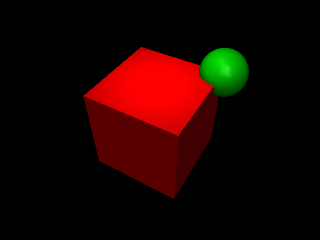

In [39]:
xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="box_and_sphere" euler="0 0 -30">
      <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""
# Make model and data
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

# Make renderer, render and show the pixels
with mujoco.Renderer(model) as renderer:
    mujoco.mj_forward(model, data)
    renderer.update_scene(data)

    media.show_image(renderer.render())

""

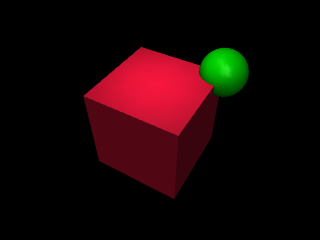

In [40]:
model.geom("red_box").rgba[:3] = np.random.rand(3)
with mujoco.Renderer(model) as renderer:
    renderer.update_scene(data)

    media.show_image(renderer.render())

In [43]:
duration = 3.8  # (seconds)
framerate = 60  # (Hz)

print("default gravity", model.opt.gravity)
model.opt.gravity = (0, 0, 10)
print("flipped gravity", model.opt.gravity)

print("Total number of DoFs in the model:", model.nv)
print("Generalized positions:", data.qpos)
print("Generalized velocities:", data.qvel)

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)  # Reset state and time.
with mujoco.Renderer(model) as renderer:
    while data.time < duration:
        mujoco.mj_step(model, data)
        if len(frames) < data.time * framerate:
            renderer.update_scene(data)
            pixels = renderer.render()
            frames.append(pixels)

media.show_video(frames, fps=framerate)

default gravity [ 0.  0. 10.]
flipped gravity [ 0.  0. 10.]
Total number of DoFs in the model: 1
Generalized positions: [1.392]
Generalized velocities: [-3.79]


""

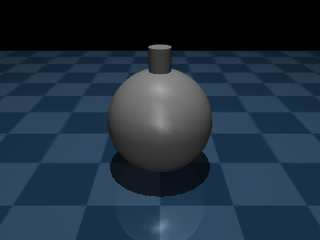

In [44]:
tippe_top = """
<mujoco model="tippe top">
  <option integrator="RK4"/>

  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3"
     rgb2=".2 .3 .4" width="300" height="300"/>
    <material name="grid" texture="grid" texrepeat="8 8" reflectance=".2"/>
  </asset>

  <worldbody>
    <geom size=".2 .2 .01" type="plane" material="grid"/>
    <light pos="0 0 .6"/>
    <camera name="closeup" pos="0 -.1 .07" xyaxes="1 0 0 0 1 2"/>
    <body name="top" pos="0 0 .02">
      <freejoint/>
      <geom name="ball" type="sphere" size=".02" />
      <geom name="stem" type="cylinder" pos="0 0 .02" size="0.004 .008"/>
      <geom name="ballast" type="box" size=".023 .023 0.005"  pos="0 0 -.015"
       contype="0" conaffinity="0" group="3"/>
    </body>
  </worldbody>

  <keyframe>
    <key name="spinning" qpos="0 0 0.02 1 0 0 0" qvel="0 0 0 0 1 200" />
  </keyframe>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(tippe_top)
data = mujoco.MjData(model)

mujoco.mj_forward(model, data)
with mujoco.Renderer(model) as renderer:
    renderer.update_scene(data, camera="closeup")

    media.show_image(renderer.render())

In [45]:
print("positions", data.qpos)
print("velocities", data.qvel)

positions [0.   0.   0.02 1.   0.   0.   0.  ]
velocities [0. 0. 0. 0. 0. 0.]


In [47]:
duration = 7  # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetDataKeyframe(model, data, 0)  # Reset the state to keyframe 0
with mujoco.Renderer(model) as renderer:
    while data.time < duration:
        mujoco.mj_step(model, data)
        if len(frames) < data.time * framerate:
            renderer.update_scene(data, "closeup")
            pixels = renderer.render()
            frames.append(pixels)

media.show_video(frames, fps=framerate)

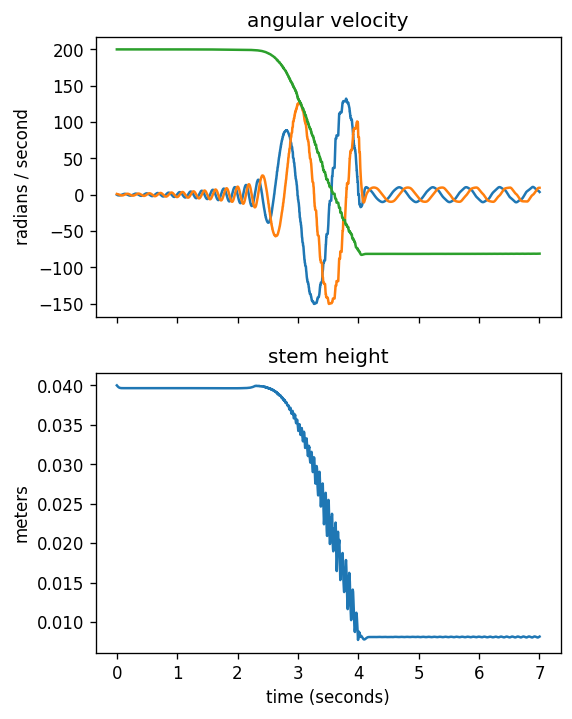

In [48]:
timevals = []
angular_velocity = []
stem_height = []

# Simulate and save data
mujoco.mj_resetDataKeyframe(model, data, 0)
while data.time < duration:
    mujoco.mj_step(model, data)
    timevals.append(data.time)
    angular_velocity.append(data.qvel[3:6].copy())
    stem_height.append(data.geom_xpos[2, 2])

dpi = 120
width = 600
height = 800
figsize = (width / dpi, height / dpi)
_, ax = plt.subplots(2, 1, figsize=figsize, dpi=dpi, sharex=True)

ax[0].plot(timevals, angular_velocity)
ax[0].set_title("angular velocity")
ax[0].set_ylabel("radians / second")

ax[1].plot(timevals, stem_height)
ax[1].set_xlabel("time (seconds)")
ax[1].set_ylabel("meters")
_ = ax[1].set_title("stem height")

In [50]:
import mujoco.viewer